In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

CLEANING DATA

In [4]:
df2=df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1','attacktype1_txt','targtype1','targtype1_txt','weaptype1_txt','nkill','natlty1_txt']]

In [5]:
#uswanie pustych rekordów
df3=df2.dropna()

In [6]:
#usuwanie miesięcy o nazwie 0
df4=df3['imonth']!=0
df5 = df3[df4]

In [7]:
df6=df5.groupby(['region_txt','weaptype1_txt'])['nkill'].agg(['sum'])

In [8]:
df7=df6.groupby(level=[0,1]).max().reset_index()

In [9]:
#'unknown' ma przyjąć wartość taka jak max ilośc wstąpień zbrodni daną bronią w danym regionie
ammong=df7.loc[df7.reset_index().groupby(['region_txt'])['sum'].idxmax()]

,region_txt,weaptype1_txt,sum
2,Australasia & Oceania,Firearms,120.0
10,Central America & Caribbean,Firearms,25291.0
19,Central Asia,Firearms,512.0
25,East Asia,Explosives,505.0
36,Eastern Europe,Explosives,4682.0
47,Middle East & North Africa,Explosives,87517.0
67,North America,Vehicle (not to include vehicle-borne explosiv...,3016.0
72,South America,Firearms,20896.0
81,South Asia,Explosives,43841.0
93,Southeast Asia,Firearms,9168.0


In [10]:
main=pd.Series(ammong.weaptype1_txt.values, index=ammong.region_txt).to_dict()

In [11]:
main

{'Australasia & Oceania': 'Firearms',
 'Central America & Caribbean': 'Firearms',
 'Central Asia': 'Firearms',
 'East Asia': 'Explosives',
 'Eastern Europe': 'Explosives',
 'Middle East & North Africa': 'Explosives',
 'North America': 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
 'South America': 'Firearms',
 'South Asia': 'Explosives',
 'Southeast Asia': 'Firearms',
 'Sub-Saharan Africa': 'Firearms',
 'Western Europe': 'Firearms'}

In [14]:
df5['main_weapon']=df5['region_txt'].map(main)

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df5.weapon=np.where(df5.weaptype1_txt=='Unknown',df5.main_weapon,df5.weaptype1_txt)

In [25]:
df_clean=df5.drop(columns=['weaptype1_txt','main_weapon'])

In [27]:
df_clean.to_csv('clean_data.csv')

GENERAL DATA MEANING

In [7]:
df6=df5[['iyear','nkill']]

In [40]:
x=df6.groupby(df4.iyear).count()
#set_index(['iyear','nkill']).count(level='iyear')

Text(0.5, 1.0, 'ilość wystąpień')

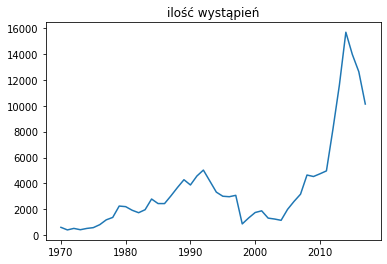

In [17]:
plt.plot(x)
plt.title('ilość wystąpień')

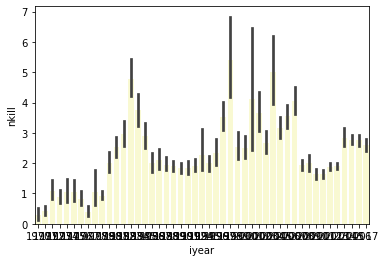

In [20]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


x_x= df4.iyear
y_y = df4.nkill
sns.barplot(x, y, palette=colors_from_values(y, "YlOrRd"))

In [ ]:
import seaborn as sns
#fig, ax = plt.subplots(figsize=(15,5))

cm = plt.cm.get_cmap('RdYlBu_r')

n, bins, patches = plt.hist(df4.nkill,25, normed=1)
# To normalize your values
col = (n-n.min())/(n.max()-n.min())
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))


# sns.countplot(df4.iyear,palette=colors_from_values(df4.nkill, "YlOrRd"),ax=ax)
# plt.xticks(rotation=90)
# plt.title('ilość wystąpień')

In [42]:
y=df3.groupby(df3.iyear)['nkill'].sum(axis=1)

Text(0.5, 1.0, 'ilość ofiar')

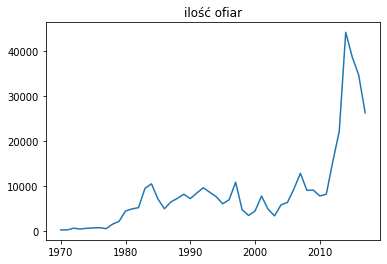

In [26]:
plt.plot(y)
plt.title('ilość ofiar')

In [44]:
z=x.merge(y, left_on='iyear', right_on='iyear')

In [45]:
z['ile_os_avg']=z.nkill_y/z.nkill_x

Text(0.5, 1.0, 'średia ilość ofiar na akt terorryzmu')

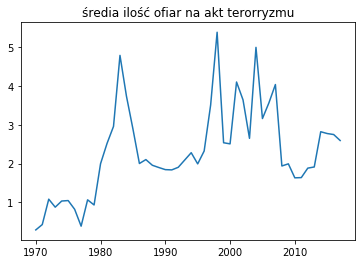

In [46]:
x=z.index.values
y=z.ile_os_avg
plt.plot(x,y)
plt.title('średia ilość ofiar na akt terorryzmu')

In [49]:
lista=df3.nkill.values
list(set(lista))

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.

In [50]:
#tabela bazowa do użycia to  df3

In [47]:
#analiza ilości zdarzeń w zależności od roku wystapienia
print('10 years with the biggest number of death')
rok=df3.groupby(df3.iyear)['nkill'].sum()
rok2=pd.DataFrame(rok)
sort=rok2.sort_values('nkill',axis= 0 ,ascending=False)
rok_nkill=sort.head(10)
print(rok_nkill)

print('10 years with the biggest number of death in divided by category')
rok_target=df3.groupby(['iyear','targtype1_txt'])['nkill'].sum()
rok_target2=pd.DataFrame(rok_target)
sort_target=rok_target2.sort_values('nkill',axis= 0 ,ascending=False)
rok_targett=sort_target.head(10)
print(rok_targett)

10 years with the biggest number of death
         nkill
iyear         
2014   44221.0
2015   38731.0
2016   34702.0
2017   26277.0
2013   22158.0
2012   15369.0
2007   12787.0
1997   10805.0
1984   10445.0
1992    9570.0
10 years with the biggest number of death in divided by category
                                     nkill
iyear targtype1_txt                       
2014  Private Citizens & Property  16567.0
2016  Private Citizens & Property  13172.0
2015  Private Citizens & Property  12951.0
2014  Military                     12613.0
2015  Military                     12021.0
2016  Military                     10463.0
2017  Military                      8524.0
      Private Citizens & Property   7228.0
1997  Private Citizens & Property   6646.0
2014  Police                        6173.0


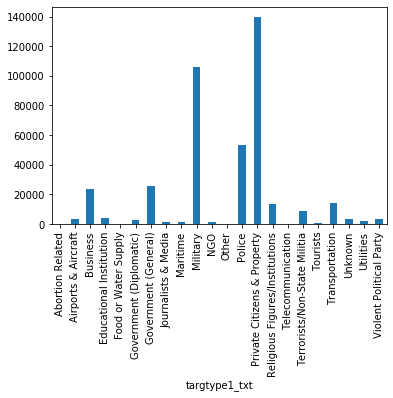

In [146]:
#których zamachów było sumarycznie najwięcej w przeciągu 1970-2017
sum_target=df3.groupby(df3.targtype1_txt)['nkill'].sum()
sum_target.plot.bar()
# rok2=pd.DataFrame(rok)
# sort=rok2.sort_values('nkill',axis= 0 ,ascending=False)
# rok_nkill=sort.head(10)
# print(rok_nkill)

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

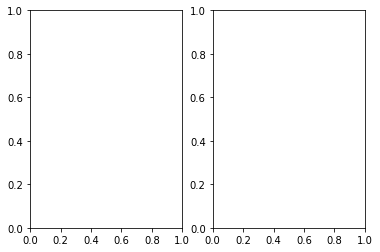

In [125]:
#histogram opisująvy rok_nkill,rok_targett
fig,axes=plt.subplots(nrows=1,ncols=2)
ax1,ax2 = axes.ravel()
rok_nkill.plot(kind='bar', ax=axes,alpha=0.75,title='Bar Plot')
plt.setp(ax1.get_xticklabels(),rotation=45,fontsize=10)
plt.setp(ax1.get_yticklabels(),rotation=0,fontsize=10)
ax1.set_xlabel('years')
ax1.set_ylabel('nkills')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

In [71]:
#analiza ilości zdarzeń w zależności od miesiąca wystąpineia
month=df6.drop(columns=['iyear'])
month2=month.groupby(df6.imonth)['nkill'].sum()
month2
#nie czyta wh tych m-cy jako zmienna liczbowa mimo tgo ze jest to int64 trzeba wyrzucić daane dla m-ca =0
#month0=df3[(df3.imonth==0)]

imonth
1     31126.0
2     30384.0
3     31278.0
4     34478.0
5     37047.0
6     37818.0
7     38330.0
8     38035.0
9     34112.0
10    34970.0
11    30839.0
12    30804.0
Name: nkill, dtype: float64

In [77]:
month_target=month.groupby(['imonth','targtype1_txt'])['nkill'].sum()
month_target2=pd.DataFrame(month_target)
sort_target_m=month_target2.sort_values('nkill',axis= 0 ,ascending=False)
sort_targett_m=sort_target_m.head(10)
print(sort_targett_m)

                                      nkill
imonth targtype1_txt                       
8      Private Citizens & Property  13807.0
9      Private Citizens & Property  13516.0
7      Private Citizens & Property  12830.0
5      Private Citizens & Property  12259.0
4      Private Citizens & Property  11933.0
6      Private Citizens & Property  11346.0
12     Private Citizens & Property  11311.0
10     Private Citizens & Property  11237.0
3      Private Citizens & Property  10779.0
6      Military                     10618.0


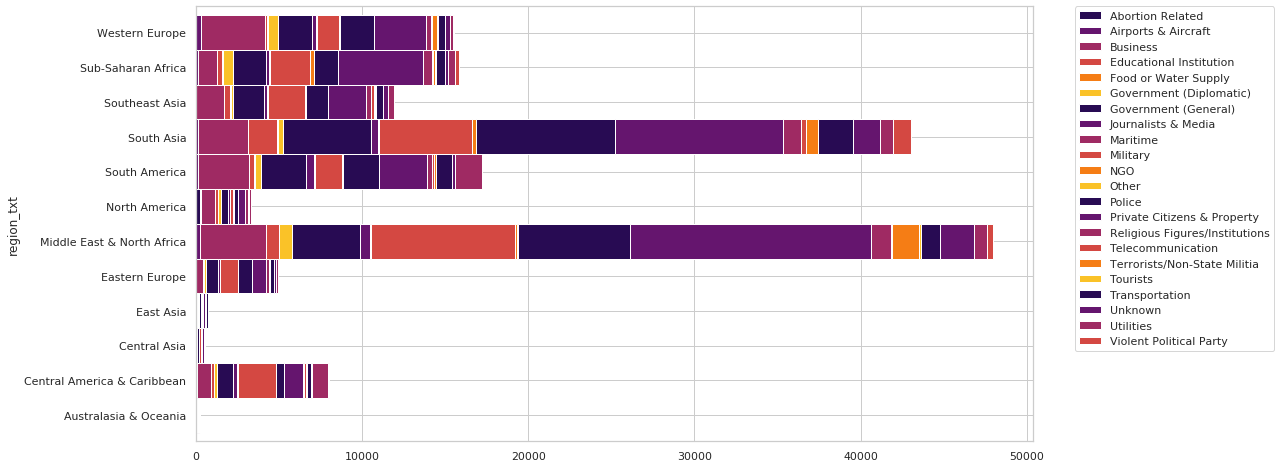

In [78]:
sns.set(style="whitegrid")
grahp=pd.crosstab(df6.region_txt,df6.targtype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno'),legend=True)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#grahp.despine(left=True)
#plt.legend(loc='upper left')
#graph.set_ylabels("survival probability")

In [74]:
df6.weaptype1_txt.uniqueue()

array(['Unknown', 'Firearms', 'Explosives', 'Incendiary', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [75]:
df6[df6.weaptype1_txt=='Unknown'].count()

iyear              12650
imonth             12650
iday               12650
country_txt        12650
region_txt         12650
city               12650
attacktype1        12650
attacktype1_txt    12650
targtype1          12650
targtype1_txt      12650
weaptype1_txt      12650
nkill              12650
natlty1_txt        12650
dtype: int64

In [82]:
region_target=df6.groupby(['region_txt','weaptype1_txt'])['nkill'].sum()
region_target=df6.groupby(['region_txt','weaptype1_txt'])['nkill'].mean()
region_target2=pd.DataFrame(region_target)
sort_region_target=region_target2.sort_values('nkill',axis= 0 ,ascending=False)
print(sort_region_target)

                                                                                  nkill
region_txt                  weaptype1_txt                                              
Middle East & North Africa  Explosives                                          87517.0
South Asia                  Explosives                                          43841.0
                            Firearms                                            43682.0
Sub-Saharan Africa          Firearms                                            38579.0
Middle East & North Africa  Firearms                                            28969.0
Central America & Caribbean Firearms                                            25291.0
Sub-Saharan Africa          Explosives                                          22202.0
South America               Firearms                                            20896.0
Middle East & North Africa  Unknown                                             14996.0
Sub-Saharan Africa          Unkn

In [130]:
df9=df8.sort_values('sum', axis = 0, ascending = False).groupby(level=0).tail(1).max()

In [94]:
loc_weapon=df6.groupby(['region_txt','weaptype1_txt'])['nkill'].sum()
loc_weapon2=pd.DataFrame(loc_weapon)
sort_loc_weapon=loc_weapon2.sort_values('nkill',axis= 0 ,ascending=False)
sort_loc_weapon_max=sort_loc_weapon[sort_loc_weapon.weaptype1_txt.unique()].max()
#dfObj[['y', 'z']].max()
# sort_loc_weapon_max=max(sort_loc_weapon)
# print(sort_loc_weapon_max)

AttributeError: 'DataFrame' object has no attribute 'weaptype1_txt'

In [19]:
#analiza ilości zdarzeń ze względu na dzień wystąpienia

In [20]:
#analiza ilości ze względu na cel aktu terror

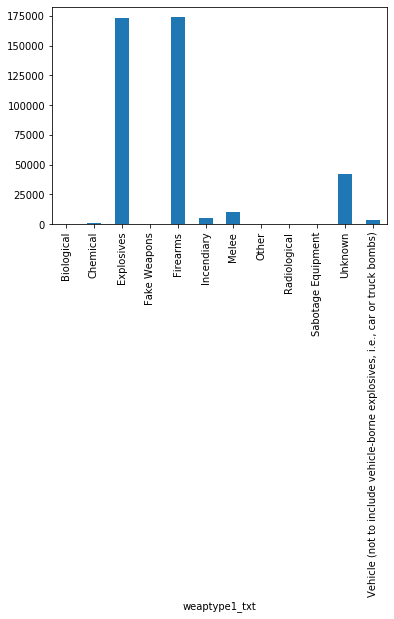

In [152]:
#analiza ze względu na uzyta broń
sum_weapon=df3.groupby(df3.weaptype1_txt)['nkill'].sum()
sum_weapon.plot.bar()

In [157]:
df3.weaptype1_txt.unique()

array(['Unknown', 'Firearms', 'Explosives', 'Incendiary', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [73]:
from PyQt5.QtWidgets import QWidget, QVBoxLayout, QPushButton, QListWidget, QApplication, QListWidgetItem

import sys

class Widget(QWidget):
    def __init__(self, parent=None):
        super(Widget, self).__init__(parent=parent)
        layout = QVBoxLayout(self)
        btn = QPushButton("btn", self)

        btn.clicked.connect(self.onClicked)
        layout.addWidget(btn)
        self.listWidget = QListWidget(self)
        layout.addWidget(self.listWidget)
        elements = ['Unknown', 'Firearms', 'Explosives', 'Incendiary', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological']
        for element in elements:
            self.listWidget.addItem(element)

        self.counter = 0

    def onClicked(self):
        print(self.listWidget.item(self.counter).text())
        self.counter = (self.counter +1) % self.listWidget.count()




app = QApplication(sys.argv)
w = Widget()
w.show()
sys.exit(app.exec_())

Unknown


KeyboardInterrupt: 

In [ ]:
#widget list https://stackoverflow.com/questions/22670214/python-how-to-use-listwidget-items-to-store-and-retrieve-objects-easy
from PyQt4 import QtGui, QtCore
import sys, os


class myItem(QtGui.QListWidgetItem):
    def __init__(self, name):
        super(myItem, self).__init__()
        self.name=name
    def getTime(self):
        import datetime
        return datetime.datetime.now()   

class Dialog_01(QtGui.QMainWindow):
    def __init__(self):
        super(QtGui.QMainWindow,self).__init__()

        myQWidget = QtGui.QWidget()
        myBoxLayout = QtGui.QVBoxLayout()
        myQWidget.setLayout(myBoxLayout)
        self.setCentralWidget(myQWidget)

        self.listWidget = QtGui.QListWidget()

        self.listWidget.currentItemChanged.connect(self.item_clicked)

        for i in range(12):
            name='Item '+str(i)
            my_item=myItem(name)
            my_item.setText('Item '+str(i))
            self.listWidget.addItem(my_item)

        myBoxLayout.addWidget(self.listWidget)

    def item_clicked(self, arg=None):
        print arg.text(), arg.getTime()


if __name__ == '__main__':
    app = QtGui.QApplication(sys.argv)
    dialog_1 = Dialog_01()
    dialog_1.show()
    dialog_1.resize(480,320)
    sys.exit(app.exec_())

In [153]:
l = [[1, 2, 3], [4, 5, 6], [7], [8, 9]]
flat_list = []
for sublist in l:
    for item in sublist:
        flat_list.append(item)

In [154]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [ ]:
flat_list = []
for sublist in l:
    for item in sublist:
        flat_list.append(item)